## MNIST
#### Dataloader, Transformation
#### Multilayer Nueral Net, Activation Function
#### Loss and Optimizer
#### Training Loop(Batch Training)
#### Model Evaluation
#### GPU Support

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
# Device Config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
# Hyper Parameters
input_size = 784 # 28 * 28
hidden_size = 100 # Hidden layer
num_classes = 10 # 0 - 9
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [35]:
# MNIST
train_dataset = torchvision.datasets.MNIST(root='.', train=True, transform=transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root='.', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Checking the shape of the data
example = iter(train_loader)
samples, labels = example.next()
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


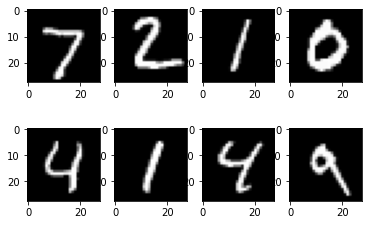

In [13]:
# Plotting the first 8 images using matplotlib
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [26]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()

        self.l1 = nn.Linear(input_size, hidden_size)

        self.relu = nn.ReLU()

        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

In [37]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [38]:
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [39]:
# Training Loop
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # original shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)

        # Forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward
        optimizer.zero_grad()   # Empties the gradient value
        loss.backward() # Calculates the gradient
        optimizer.step()    # Updates the weights

        if (i + 1) % 100 == 0:
            print(f'epoch {epoch + 1} / {num_epochs}, step {i + 1} / {n_total_steps}, loss: {loss.item():.4f}')


epoch 1 / 2, step 100 / 600, loss: 0.4920
epoch 1 / 2, step 200 / 600, loss: 0.3084
epoch 1 / 2, step 300 / 600, loss: 0.3233
epoch 1 / 2, step 400 / 600, loss: 0.2447
epoch 1 / 2, step 500 / 600, loss: 0.3428
epoch 1 / 2, step 600 / 600, loss: 0.1782
epoch 2 / 2, step 100 / 600, loss: 0.2290
epoch 2 / 2, step 200 / 600, loss: 0.0793
epoch 2 / 2, step 300 / 600, loss: 0.1032
epoch 2 / 2, step 400 / 600, loss: 0.1345
epoch 2 / 2, step 500 / 600, loss: 0.1807
epoch 2 / 2, step 600 / 600, loss: 0.1493


In [44]:
# Test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28 * 28).to(device)
        lables = labels.to(device)
        output = model(images)

        # value, index
        _, predictions = torch.max(output, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()

    print(f'n_correct: {n_correct}, n_samples: {n_samples}')
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy: {acc}')

n_correct: 9530, n_samples: 10000
Accuracy: 95.3
